# Unsupervised classification using Gaussian Mixture Model with dimensioinality reduction using manifold learning algorithms.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.ticker as mticker
from sklearn import metrics
from time import time
import numpy as np
import pandas as pd
from collections import OrderedDict
from manifold_helper import ManifoldHelper


rng = np.random.default_rng(seed=42)

def plot_images(data, n_img_per_row=10, cmap='gray'):
    # plot images of MNIST base
    shape = int(np.sqrt(len(data[0])))
    # plot iage of the digits
    img = np.zeros( (shape * n_img_per_row, shape * n_img_per_row) )
    for i in range( n_img_per_row ):
        ix = shape * i
        for j in range( n_img_per_row ):
            iy = shape * j
            img[ix:ix + shape, iy:iy + shape] = data[i * n_img_per_row + j].reshape( (shape, shape) )

    plt.figure(figsize=(15, 15))
    plt.imshow( img, cmap=cmap )
    plt.xticks( [] )
    plt.yticks( [] )
    plt.show()

In [2]:
n_class = 10
amostras = 3000
neighbors = [5, 8, 10, 12]
dimensions = [2, 3, 5, 10, 25, 50, 100]
methods = ['ISOMAP', 'LLE', 'SE', 'LTSA']

# Load the data

In [3]:
datasetOriginal = pd.read_csv("data/mnist_train.csv")
df = datasetOriginal.copy()
df

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 359.3 MB


In [5]:
# separar os rótulos dos dados
label, x = df.iloc[:, :1], df.iloc[:, 1:]
label = label.to_numpy().transpose()[0]
x = x.to_numpy()
label, x

(array([5, 0, 4, ..., 5, 6, 8], dtype=int64),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64))

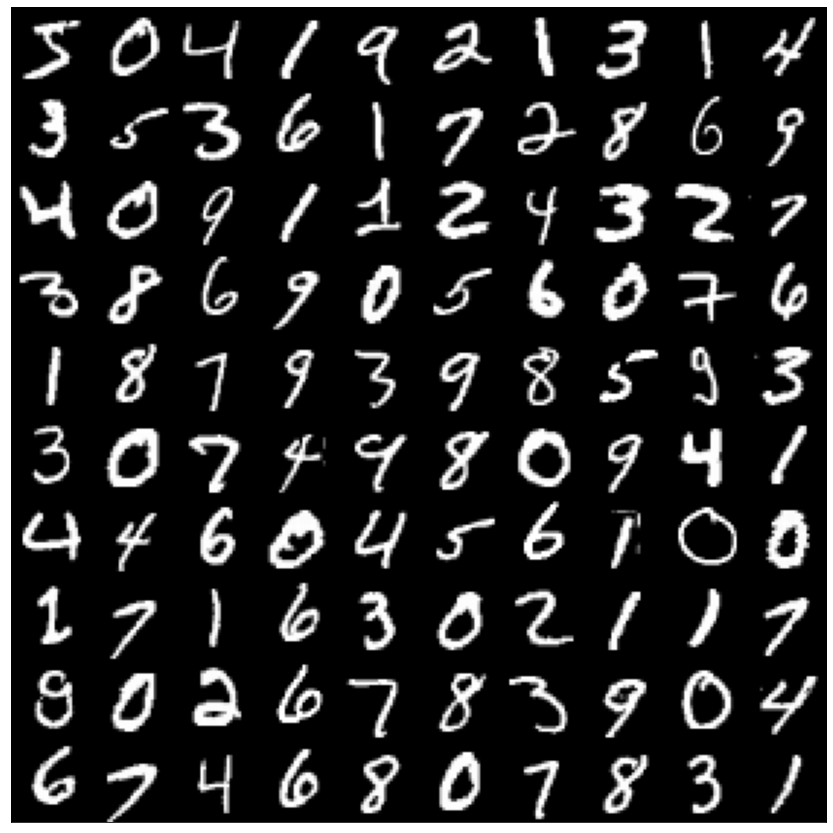

In [6]:
plot_images(x)

## Select the images for classification

In [7]:
idx = np.argsort(label)
label = label[idx]
x = x[idx]

idx = np.random.RandomState(seed=42).permutation(len(x))
x = x[idx, :]
label = label[idx]
x_cut = x[:amostras, :]
label_cut = label[:amostras]

unique, counts = np.unique(label_cut, return_counts=True)
num_data_cut = dict(zip(unique, counts))
print(x_cut.shape)
num_data_cut

(3000, 784)


{0: 286,
 1: 353,
 2: 274,
 3: 316,
 4: 289,
 5: 290,
 6: 306,
 7: 307,
 8: 290,
 9: 289}

Using alternative LTSA.


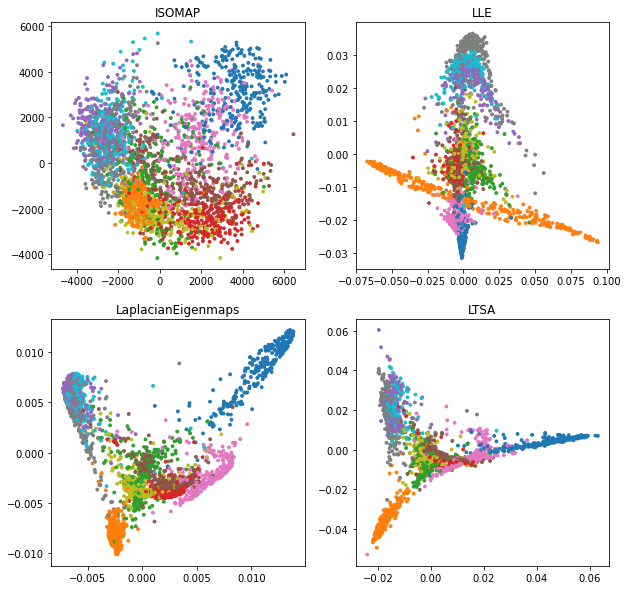

In [8]:
k = 12
d = 2

Y = OrderedDict()
manifold = ManifoldHelper()

for m in methods:
    Y[m] = manifold.fit_transform(x_cut, m, k, d)
    
# defina cores para os plots
label_colors = [list( mcolors.TABLEAU_COLORS )[i] for i in range( 10 )]
colors = [label_colors[v] for v in label_cut]
    
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
for i in range(2):
    for j in range(2):
        m = methods[i * 2 + j]
        axs[i, j].scatter(Y[m][:, 0], Y[m][:, 1], c=colors, s=8)
        if m == 'SE':
            m = 'LaplacianEigenmaps'
        axs[i, j].set_title(m)

# Evaluation using Adjusted Rand Index

In [9]:
manifold = ManifoldHelper(neighbors, dimensions, methods, alternative_LTSA=True)

Using alternative LTSA.


In [10]:
ari_results = manifold.evaluate_all(x_cut, label_cut, n_components=n_class)


2_dimension:
   5_neighbors: 0.32 (3.74s) 0.40 (1.05s) 0.39 (0.67s) -0.00 (16.95s)
   8_neighbors: 0.27 (4.01s) 0.40 (1.57s) 0.39 (0.84s) 0.24 (17.39s)
   10_neighbors: 0.30 (4.30s) 0.35 (1.70s) 0.36 (1.07s) 0.30 (16.98s)
   12_neighbors: 0.29 (4.43s) 0.38 (1.54s) 0.36 (0.96s) 0.36 (16.98s)
3_dimension:
   5_neighbors: 0.31 (3.62s) 0.44 (1.03s) 0.45 (0.68s) -1.00 (29.89s)
   8_neighbors: 0.28 (4.06s) 0.43 (1.80s) 0.44 (0.76s) 0.00 (16.80s)
   10_neighbors: 0.28 (4.30s) 0.41 (1.81s) 0.47 (0.88s) 0.27 (17.01s)
   12_neighbors: 0.28 (4.54s) 0.41 (1.84s) 0.44 (0.87s) 0.36 (17.12s)
5_dimension:
   5_neighbors: 0.52 (3.72s) 0.48 (1.30s) 0.50 (0.85s) -1.00 (13.81s)
   8_neighbors: 0.45 (4.20s) 0.44 (1.82s) 0.50 (1.02s) 0.00 (16.35s)
   10_neighbors: 0.40 (4.33s) 0.37 (1.90s) 0.50 (1.06s) 0.35 (16.74s)
   12_neighbors: 0.50 (4.57s) 0.35 (1.71s) 0.50 (1.02s) 0.38 (17.22s)
10_dimension:
   5_neighbors: 0.52 (4.69s) 0.49 (2.42s) 0.65 (0.82s) -1.00 (13.83s)
   8_neighbors: 0.56 (5.12s) 0.45 (2.34

In [11]:
manifold.evaluate_gmm_ari(x_cut, label_cut, n_class)

0.36818783331318994

In [12]:
random_label = np.random.default_rng(42).integers(0, n_class, size=len(x_cut))
random_ari = metrics.adjusted_rand_score(random_label, label_cut)
print(f'ARI com labels randômicos: {random_ari:.2f}')

ARI com labels randômicos: -0.00


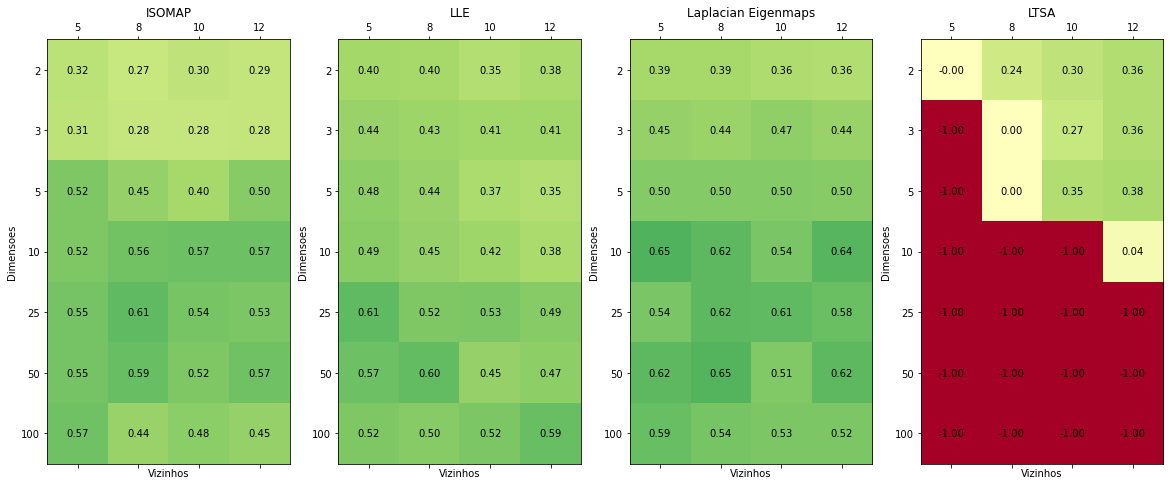

In [13]:
manifold.plot_ari_results(ari_results, neighbors, dimensions)

In [14]:
for m in methods:
    ari_max = np.max(ari_results[m])
    row, col = np.unravel_index(np.argmax(ari_results[m], axis=None), ari_results[m].shape)
    k = neighbors[col]
    d = dimensions[row]
    print(f'{m}: max = {ari_max:.2f} in ({k}, {d})')

ISOMAP: max = 0.61 in (8, 25)
LLE: max = 0.61 in (5, 25)
SE: max = 0.65 in (5, 10)
LTSA: max = 0.38 in (12, 5)


In [15]:
# manifold.saveARI(ari_results, add='id_3000')

# Visuzlize the time comparison when using manifold learning

In [16]:
manifold = ManifoldHelper()

parametros = OrderedDict()
# ISOMAP: k = 8 e d = 25
parametros['ISOMAP'] = {'k': 8, 'd': 25}
# LLE: k = 5 e d = 25
parametros['LLE'] = {'k': 5, 'd': 25}
# Laplacian Eigenmaps: k = 5 e d = 10
parametros['SE'] = {'k': 5, 'd': 10}
# LTSA: k = 12 e d = 5
parametros['LTSA'] = {'k': 12, 'd': 5}

amostras = np.arange(1000, 12001, 1000)
methods = ['ISOMAP', 'LLE', 'SE', 'LTSA']
ari_results = OrderedDict()
time_results = OrderedDict()
for m in methods:
    ari_results[m] = np.zeros(len(amostras))
    time_results[m] = np.zeros(len(amostras))
ari_results['GMM'] = np.zeros(len(amostras))
time_results['GMM'] = np.zeros(len(amostras))
    
for i in range(len(amostras)):
    x_cut = x[:amostras[i], :]
    label_cut = label[:amostras[i]]
    
    t0 = time()
    gmm_predict = manifold._gmm_predict(x_cut, 10)
    t1 = time()
    
    ari_results['GMM'][i] = metrics.adjusted_rand_score(gmm_predict, label_cut)
    time_results['GMM'][i] = t1 - t0

    m = 'GMM'
    print(f'\nAmostras: {amostras[i]} GMM: {ari_results[m][i]:.2f}({time_results[m][i]:.1f})')
    
    for m  in methods:
        k = parametros[m]['k']
        d = parametros[m]['d']
        t0 = time()
        Y = manifold.fit_transform(x_cut, m, k, d)
        gmm_predict = manifold._gmm_predict(Y, 10)
        t1 = time()
        
        ari_results[m][i] = metrics.adjusted_rand_score(gmm_predict, label_cut)
        time_results[m][i] = t1 - t0
        
        print(f' {ari_results[m][i]:.2f}({time_results[m][i]:.1f}s) ', end='')

Using alternative LTSA.

Amostras: 1000 GMM: 0.37(4.3)
 0.49(0.6s)  0.44(0.5s)  0.45(0.3s)  0.19(1.9s) 
Amostras: 2000 GMM: 0.33(6.9)
 0.56(2.3s)  0.49(1.2s)  0.56(0.7s)  0.28(6.6s) 
Amostras: 3000 GMM: 0.37(9.6)
 0.61(5.5s)  0.61(2.7s)  0.65(0.8s)  0.38(17.0s) 
Amostras: 4000 GMM: 0.41(20.5)
 0.61(10.7s)  0.58(5.5s)  0.49(1.4s)  0.18(34.2s) 
Amostras: 5000 GMM: 0.33(62.2)
 0.58(18.8s)  0.55(9.5s)  0.56(2.2s)  0.22(58.9s) 
Amostras: 6000 GMM: 0.30(83.2)
 0.62(30.4s)  0.59(16.4s)  0.58(2.3s)  0.28(96.7s) 
Amostras: 7000 GMM: 0.29(127.4)
 0.57(44.8s)  0.64(26.2s)  0.57(3.4s)  0.08(143.0s) 
Amostras: 8000 GMM: 0.28(215.2)
 0.59(62.4s)  0.57(36.1s)  0.63(4.1s)  0.07(203.4s) 
Amostras: 9000 GMM: 0.28(220.6)
 0.55(83.6s)  0.63(48.2s)  0.68(5.6s)  -0.00(274.1s) 
Amostras: 10000 GMM: 0.26(250.9)
 0.52(109.7s)  0.62(63.7s)  0.68(6.9s)  -0.00(362.2s) 
Amostras: 11000 GMM: 0.25(359.8)
 0.65(140.0s)  0.70(83.5s)  0.69(8.2s)  0.21(465.3s) 
Amostras: 12000 GMM: 0.20(299.5)
 0.58(175.1s)  0.68(112.2s

In [17]:
def plot_ari_results_time(method, title, color, marker, size=6):
    fig, ax1 = plt.subplots()
    plt.xticks(amostras, rotation=45, ha='center')
    plt.title(title)

    ax1.set_xlabel('Amostras (n)')
    ax1.set_ylabel('Adjusted Rand Index')
    ax1.plot(amostras, ari_results['GMM'], color='tab:red', marker='o', linestyle='dotted', label='ARI: GMM')
    ax1.plot(amostras, ari_results[method], color=color, marker=marker, label=f'ARI: GMM com {method}', markersize=size)
    ax1.set_yticks(np.arange(0, 1.01, 0.1))
    ax1.grid()

    ax2 = ax1.twinx()
    color = '#000000'
    ax2.set_ylabel('Tempo (s)', color=color)
    ax2.plot(amostras, time_results['GMM'], color=color, marker='s', linestyle='dotted', label='Tempo: GMM', markersize=5)
    ax2.plot(amostras, time_results[method], color=color, marker='s', label=f'Tempo: GMM com {method}', markersize=5)
    ax2.tick_params(axis='y', labelcolor=color)

    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc=0)

    fig.tight_layout()
    plt.show()

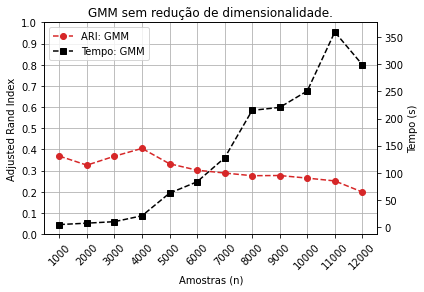

In [18]:
fig, ax1 = plt.subplots()
plt.xticks(amostras, rotation=45, ha='center')

color = 'tab:red'
ax1.set_xlabel('Amostras (n)')
ax1.set_ylabel('Adjusted Rand Index')
ax1.plot(amostras, ari_results['GMM'], color=color, marker='o', label='ARI: GMM', linestyle='dashed')
ax1.tick_params(axis='y')
ax1.set_yticks(np.arange(0, 1.1, 0.1))
ax1.grid()

ax2 = ax1.twinx()
color = '#000000'
ax2.set_ylabel('Tempo (s)')
ax2.plot(amostras, time_results['GMM'], color=color, marker='s', label='Tempo: GMM', linestyle='dashed')
ax2.tick_params(axis='y', labelcolor=color)

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

fig.tight_layout()
plt.title('GMM sem redução de dimensionalidade.')
plt.show()

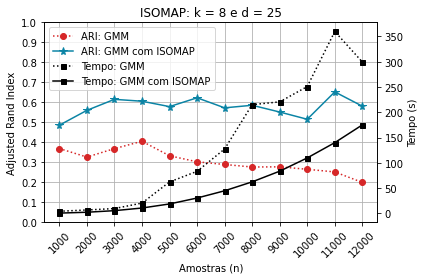

In [19]:
plot_ari_results_time('ISOMAP', 'ISOMAP: k = 8 e d = 25', '#0b84a5', '*', size=8)

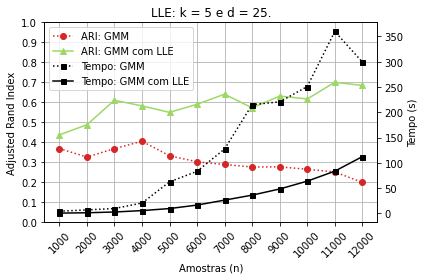

In [20]:
plot_ari_results_time('LLE', 'LLE: k = 5 e d = 25.', '#9dd866', '^')

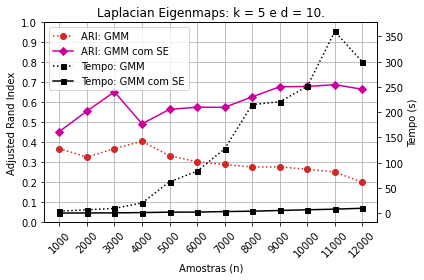

In [21]:
plot_ari_results_time('SE', 'Laplacian Eigenmaps: k = 5 e d = 10.', '#cc0099', 'D')

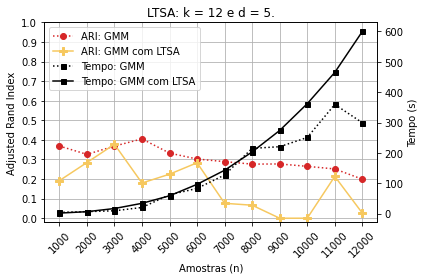

In [22]:
plot_ari_results_time('LTSA', 'LTSA: k = 12 e d = 5.', '#f6c85f', 'P', size=8)

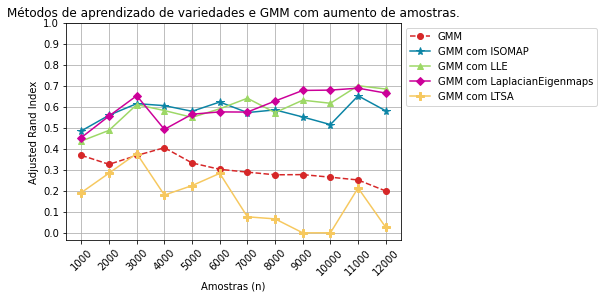

In [23]:
fig, ax1 = plt.subplots()
plt.xticks(amostras, rotation=45, ha='center')
plt.title('Métodos de aprendizado de variedades e GMM com aumento de amostras.')
    
ax1.set_xlabel('Amostras (n)')
ax1.set_ylabel('Adjusted Rand Index')

ax1.plot(amostras, ari_results['GMM'], color='tab:red', marker='o', label='GMM', linestyle='dashed')
ax1.plot(amostras, ari_results['ISOMAP'], color='#0b84a5',marker='*', label='GMM com ISOMAP', markersize=8)
ax1.plot(amostras, ari_results['LLE'], color='#9dd866', marker='^', label='GMM com LLE')
ax1.plot(amostras, ari_results['SE'], color='#cc0099', marker='D', label='GMM com LaplacianEigenmaps')
ax1.plot(amostras, ari_results['LTSA'], color='#f6c85f', marker='P', label='GMM com LTSA', markersize=8)
ax1.set_yticks(np.arange(0, 1.01, 0.1))

plt.legend(loc=0, bbox_to_anchor=(1, 1))
plt.grid()
plt.show()

In [26]:
ari_media = OrderedDict()
for m in methods:
    ari_media[m] = np.mean(ari_results[m])
ari_media['GMM'] = np.mean(ari_results['GMM'])
ari_media

OrderedDict([('ISOMAP', 0.5769738455120837),
             ('LLE', 0.5918816238395609),
             ('SE', 0.600652853432749),
             ('LTSA', 0.16022758772819531),
             ('GMM', 0.3050004453798438)])